# Linear Support Vector Classification

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

Applying the one-vs-rest method to a simple three-class classification dataset.

In [1]:
# install mglearn if not present already
!pip install mglearn

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [2]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.23.1
matplotlib version: 2.2.2
NumPy version: 1.14.5
SciPy version: 1.1.0
IPython version: 6.2.1
scikit-learn version: 0.19.1
matplotlib version: 2.2.2


In [3]:
import mglearn as mg

In [4]:
print("mglearn version: {}".format(mg.__version__))

mglearn version: 0.1.6


In [5]:
make_blobs()

(array([[ -7.22236015,  -5.47851849],
        [ -8.32829271,  -7.11016945],
        [  5.71549664,  -5.23317302],
        [  5.69207676,  -4.05588273],
        [  5.30183835,  -5.65446316],
        [  5.40506018,  -4.09346178],
        [  5.68967882,  -7.71400844],
        [  5.75410418,  -5.19397631],
        [  4.03248318,  -9.28272013],
        [  8.27913075,  -4.48881432],
        [  6.66634541,  -3.25571422],
        [  3.91300084,  -9.80894844],
        [  4.66637747, -10.28235826],
        [  6.59507345,  -5.88630326],
        [  4.17353471,  -9.06788203],
        [ -7.52897513,  -5.31272837],
        [  6.26750337,  -9.14902857],
        [ -8.32740079,  -7.86998376],
        [ -8.44393104,  -5.30120317],
        [ -7.19687664,  -4.17810953],
        [  5.41635574,  -4.21884715],
        [ -8.16370021,  -3.31808545],
        [  5.44986484,  -8.22276412],
        [ -6.63224973,  -6.09655804],
        [  6.62316212,  -5.97481427],
        [  4.7835511 ,  -9.24128522],
        [ -6

In [6]:
X, y = make_blobs(random_state=23)
X, y

(array([[-1.49211009e+00,  8.00048345e+00],
        [-2.15904392e-02,  7.80179239e+00],
        [ 5.37460126e+00, -3.12765245e+00],
        [-4.38451150e+00,  3.32409481e+00],
        [-3.88850604e+00,  4.54507091e+00],
        [ 3.59379934e-01,  9.87519697e+00],
        [-5.58283415e+00,  3.99641097e+00],
        [ 4.53959614e+00, -4.15996344e+00],
        [-5.81801602e+00,  3.18704223e+00],
        [ 4.48625651e+00, -5.95019223e+00],
        [ 5.53570693e+00, -4.11818513e+00],
        [-2.16027264e+00,  9.08621257e+00],
        [ 5.13015959e+00, -3.34102429e+00],
        [-6.12073151e+00,  4.51823547e+00],
        [-6.91264687e+00,  4.22049944e+00],
        [-1.36601802e-01,  1.01838626e+01],
        [ 4.51383197e+00, -5.36361832e+00],
        [-5.00614298e+00,  3.07150408e+00],
        [ 1.84611290e-01,  1.01316564e+01],
        [ 5.44061149e+00, -2.74884901e+00],
        [ 8.84119643e-01,  9.75137075e+00],
        [ 3.58594213e+00, -3.89082392e+00],
        [-5.38923704e+00,  3.492

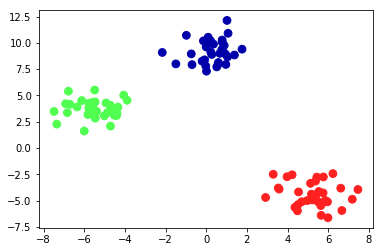

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mg.cm3)

Fit the model according to the given training data.

    X : {array-like, sparse matrix}, shape = [n_samples, n_features]

        Training vector, where n_samples in the number of samples and n_features is the number of features.

    y : array-like, shape = [n_samples]

        Target vector relative to X

    sample_weight : array-like, shape = [n_samples], optional

        Array of weights that are assigned to individual samples. If not provided, then each sample is given unit weight.

In [8]:
# train a LinearSVC classifier on the dataset

linear_svm = LinearSVC().fit(X, y)
linear_svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
linear_svm.coef_.shape, linear_svm.intercept_.shape

((3, 2), (3,))

The shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes. Each row has two entries, corresponding to the two features in the dataset.

The intercept_ is now a one-dimensional array, storing the intercepts for each class.

In [10]:
linear_svm.coef_, linear_svm.intercept_

(array([[ 0.22352455,  0.31499286],
        [ 0.16658977, -0.15196926],
        [-0.55617144, -0.20559462]]),
 array([-1.37614552,  0.04840742, -0.24950155]))

Visualizing the lines given by the three binary classifiers

(-10, 8)

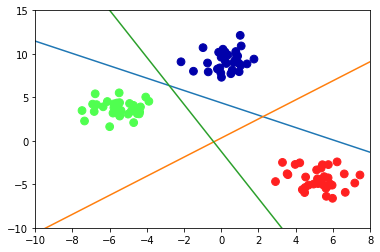

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mg.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

The orange line shows the decision boundary for the binary classifier for the red class.

The green line shows the decision boundary for the binary classifier for the green class.

The blue line shows the decision boundary for the binary classifier for the blue class.

You can see that all the red points in the training data are below the orange line, which means they are on the “red” side of this binary classifier. The red points are left of the green line, which means they are classified as “rest” by the binary classifier for the green class. The red points are below the blue line, which means the binary classifier for the blue class also classifies them as “rest”. Therefore, any point in this area will be classified as red by the final classifier (Formula of the red classifier is greater than zero, while it is smaller than zero for the other two classes).

Formula: classification confidence <br/>
w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b


And the triangle in the middle of the plot - All three binary classifiers classify points there as “rest”. Which class would a point there be assigned to?

The answer is the one with the highest value in Formula, i.e., the class of the closest line.

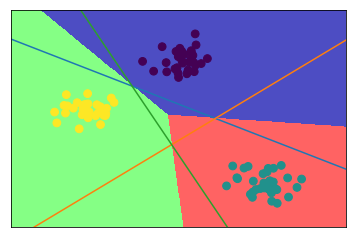

In [12]:
mg.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

### References

1. Introduction to Machine Learning with Python by Andreas C. Mueller and Sarah Guido